## Clasificación de dígitos escritos a mano


### Importar librerías

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

### Descargar el conjunto de datos

In [7]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Exploración de los datos


In [8]:
# Tamaño del conjunto de datos de entrenamiento
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [9]:
y_train.shape

(60000,)

In [10]:
# Tamaño del conjunto de datos de prueba
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [11]:
print('Valor mínimo: ',x_train.min())
print('Valor máximo: ', x_train.max())

Valor mínimo:  0
Valor máximo:  255


In [12]:
# Reescalar  imágenes
x_train = x_train / 255.0
x_test = x_test / 255.0

In [13]:
print('Valor mínimo: ',x_train.min())
print('Valor máximo: ', x_train.max())

Valor mínimo:  0.0
Valor máximo:  1.0


In [14]:
def visualize_dataset(n,x,y):
    plt.figure(figsize=(10,10))
    for i in range(n*n):
        plt.subplot(n,n,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i], cmap=plt.get_cmap('gray'))
        plt.xlabel(y[i])
    plt.show()

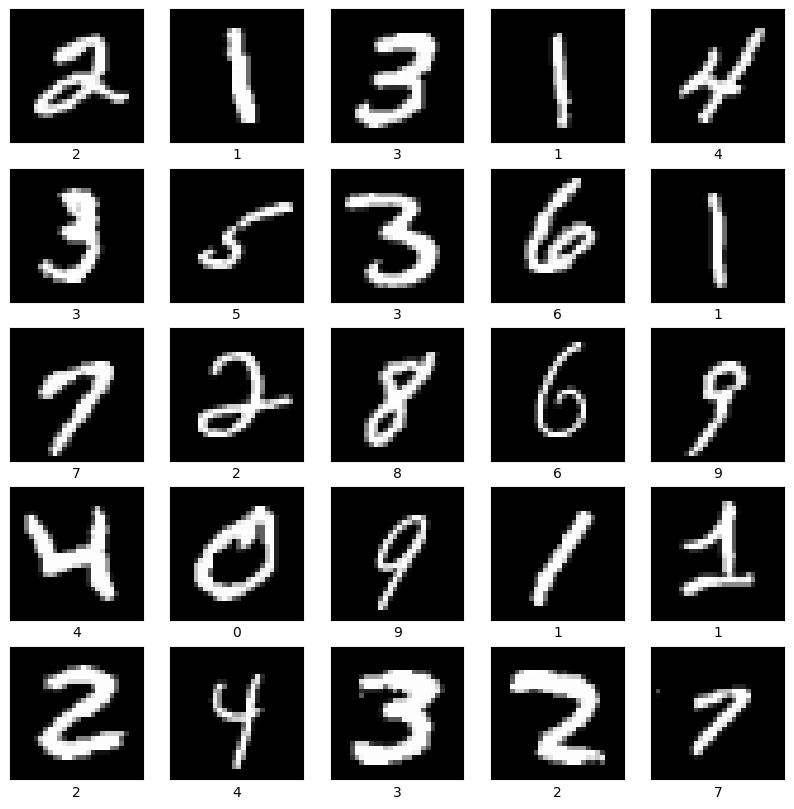

In [15]:
visualize_dataset(5,x_train[5:30,:],y_train[5:30])

In [16]:
def visualize_labels(y,visualize=False):
    unique, counts = np.unique(y, return_counts=True) # Encuentra los elementos únicos de un array
    print('Clases: ', unique)
    print('Número de instancias por clase', counts)

    if visualize == True:
        plt.figure(figsize=(11,5))
        plt.bar(unique,counts, color = (0.3,0.1,0.4,0.6))
        plt.xlabel('Clases')
        plt.ylabel('Frecuencia')
        plt.xticks(unique)

        for i, v in enumerate(counts):
            plt.text(i-0.25, v+10, str(v), color = 'blue')
        plt.show()


Clases:  [0 1 2 3 4 5 6 7 8 9]
Número de instancias por clase [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


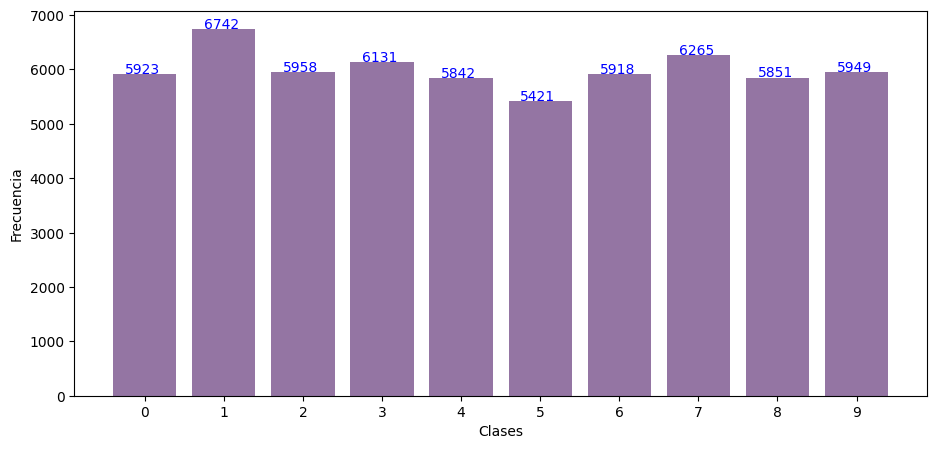

In [17]:
visualize_labels(y_train, True)

### Definición del modelo

In [18]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\santi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [22]:
es = EarlyStopping(monitor='val_loss', patience=10,  mode='min',  verbose=1)
checkpoint = keras.callbacks.ModelCheckpoint("best_model_Mnist.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')


### Entrenamiento del modelo


In [23]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[es, checkpoint] ,epochs=200,verbose=1)

Epoch 1/200
1846/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.8421 - loss: 0.5276
Epoch 1: val_loss improved from inf to 0.14534, saving model to best_model_Mnist.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 960us/step - accuracy: 0.8433 - loss: 0.5239 - val_accuracy: 0.9559 - val_loss: 0.1453
Epoch 2/200
1811/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.9608 - loss: 0.1357
Epoch 2: val_loss improved from 0.14534 to 0.11847, saving model to best_model_Mnist.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.9609 - loss: 0.1356 - val_accuracy: 0.9653 - val_loss: 0.1185
Epoch 3/200
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.9692 - loss: 0.1023
Epoch 3: val_loss improved from 0.11847 to 0.11221, saving model to best_model_Mnist.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - accuracy: 0.9692 - loss: 0.1023 - val_accuracy: 0.9657 - val_loss: 0.1122
Epoch 4/200
1845/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.9755 - loss: 0.0802
Epoc

### Evaluación del modelo

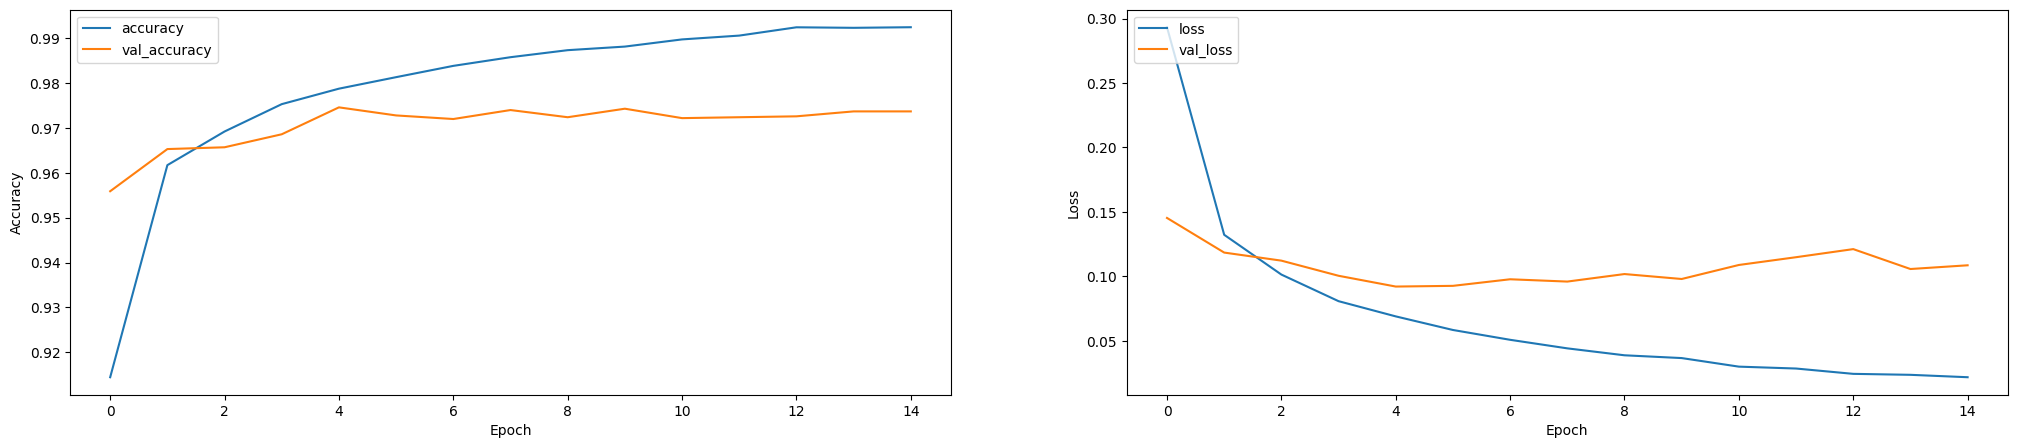

In [24]:
fig, axs = plt.subplots(1, 2,figsize=(25, 5))
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label = 'val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
#axs[0].set_ylim([0.89,0.92])
axs[0].legend(loc='upper left')

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label = 'val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
#axs[1].set_ylim([0.31, 0.37])
axs[1].legend(loc='upper left')
plt.show()

In [25]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=0)
print(f'Test accuracy: {test_acc:.2f}')
print(f'Test loss: {test_loss:.2f}')

Test accuracy: 0.97
Test loss: 0.11


In [26]:
# Guardar el modelo
model.save('mnist_model.keras')

In [27]:
model = load_model('mnist_model.keras')

In [28]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step


In [29]:
y_pred

array([[2.7290203e-09, 2.2937201e-10, 3.0867824e-08, ..., 9.9999893e-01,
        1.5783485e-09, 8.7874429e-07],
       [1.7203768e-19, 2.6785075e-08, 1.0000000e+00, ..., 4.0500040e-19,
        5.5191843e-13, 1.4280811e-21],
       [1.1083090e-08, 9.9986160e-01, 4.2646043e-06, ..., 1.2425570e-04,
        8.8730567e-06, 6.3718647e-10],
       ...,
       [6.2437892e-18, 3.5910030e-14, 2.0367051e-17, ..., 1.4853169e-11,
        3.4828619e-11, 2.1166008e-11],
       [1.0370585e-15, 8.6931865e-17, 1.6903520e-15, ..., 1.5621380e-17,
        5.0156729e-08, 9.8254876e-17],
       [1.8054545e-12, 9.3314625e-21, 7.4576325e-14, ..., 1.2042998e-14,
        4.5456911e-14, 3.6896689e-18]], dtype=float32)

In [30]:
print(y_pred[1])

[1.72037683e-19 2.67850755e-08 1.00000000e+00 1.00628306e-12
 1.02820714e-23 1.42136192e-16 6.37167248e-19 4.05000398e-19
 5.51918428e-13 1.42808108e-21]


In [31]:
# Suma de las salidas de softmax
print(np.sum(y_pred[1]))

1.0


In [32]:
y_pred = np.argmax(model.predict(x_test), axis=-1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step


In [33]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

Matriz de confusión

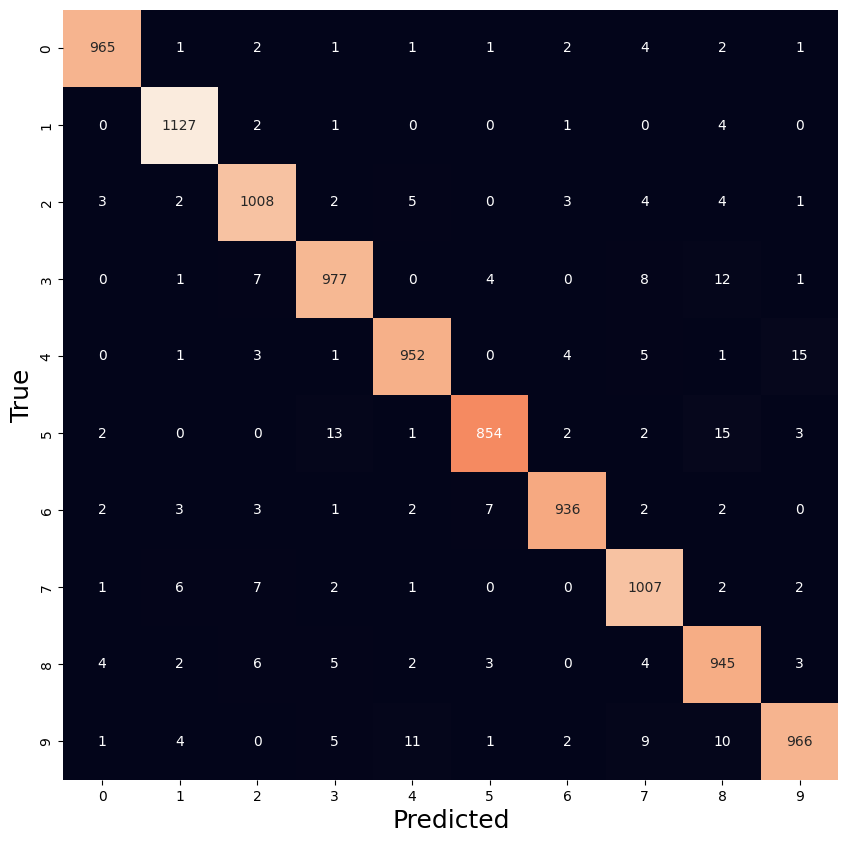

In [34]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cf_matrix, annot=True,cbar=False,fmt='d')
plt.xlabel("Predicted", fontsize = 18)
plt.ylabel("True", fontsize = 18)
plt.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.99      0.98      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [36]:
def plot_prediction(index):
    print('Valor real: ',y_test[index])
    print('Predicción: ',y_pred[index])
    plt.figure(figsize=(6,3))
    plt.imshow(x_test[index], cmap='gray')
    plt.axis('off')
    plt.show()

Valor real:  9
Predicción:  9


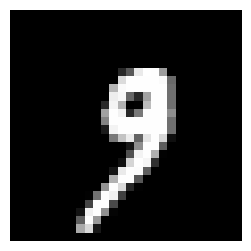

In [37]:
i = 1000
plot_prediction(i)